In [103]:
from torch.utils.data import Dataset
from PIL import Image
from pathlib import Path
import numpy as np
import random
import torch

class SegmentationDataset(Dataset):
    def __init__(self, ds_path, ext=".png", transform=None, target_transform=None):
        super().__init__()
        self.images = sorted(Path(ds_path).joinpath("x").glob("*"+ext))
        self.labels = sorted(Path(ds_path).joinpath("y").glob("*"+ext))
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(list(self.images))
    
    def __getitem__(self, idx):
        img = Image.open(self.images[idx]).convert('RGB')
        target = Image.open(self.labels[idx])
        
        seed = np.random.randint(2147483647) # make a seed with numpy generator 
        random.seed(seed) # apply this seed to img tranfsorms        
        
        if self.transform is not None:
            img = self.transform(img)
            
        random.seed(seed) # apply this seed to target tranfsorms
        if self.target_transform is not None:
            target = self.target_transform(target)

#         target = torch.ByteTensor(np.array(target))
        
        return img, target

    
ds_path = "../data/datasets/Calvert_2012"
ds = SegmentationDataset(ds_path)

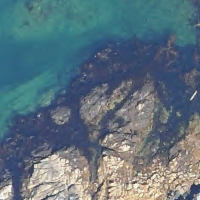

In [104]:
ds[7][0]

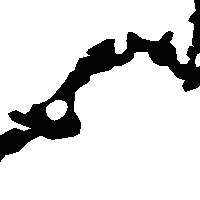

In [105]:
ds[7][1]

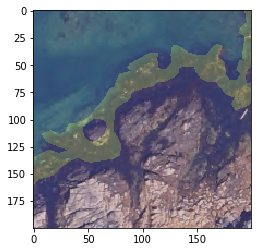

In [106]:
import matplotlib.pyplot as plt

x, y = ds[7]
plt.imshow(x)
plt.imshow(y, alpha=0.2)
plt.show()

In [119]:
from torchvision import transforms

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(45),
#     transforms.ToTensor(),
#     normalize,
])
train_target_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(45, fill=(0,)),
#     transforms.ToTensor(),
#     normalize,
])

ds = SegmentationDataset("../data/datasets/Calvert_2012", transform=train_transforms, target_transform=train_target_transforms)


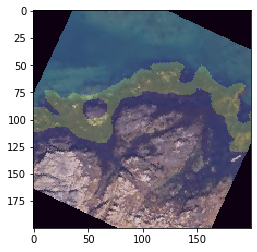

In [120]:
import matplotlib.pyplot as plt

x, y = ds[7]
plt.imshow(x)
plt.imshow(y, alpha=0.2)
plt.show()